# TensorFlow Lite 구현: 모델 선택 및 변환

> ### 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')
save_dir = '/content/drive/My Drive/files/save/'

Mounted at /content/drive


>### Load modules

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load MNIST Data

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.astype(np.double)
train_data = np.expand_dims(train_data, axis=-1)
train_data = train_data / 255.0

test_data = test_data.astype(np.double)
test_data = np.expand_dims(test_data, axis=-1)
test_data = test_data / 255.0

11493376/11490434 [==============================] - 0s 0us/step


>### Create Model


In [4]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu',input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

>### Compile Model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss='categorical_crossentropy',
              metrics=['accuracy'])

>### 결과 출력을 위한 함수

In [6]:
def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### 학습 전 상황

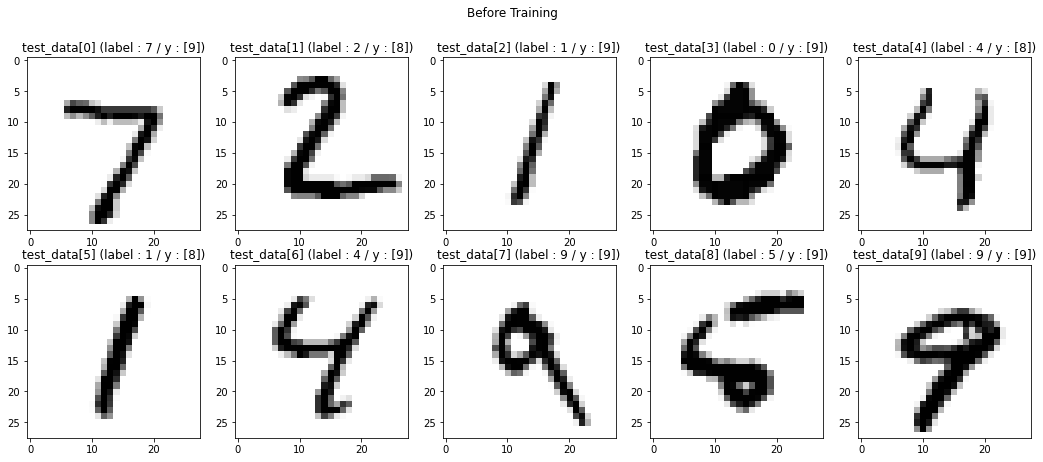

In [7]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

> ### 학습 (Training)

In [8]:
%%time
history = model.fit(train_data, train_labels, shuffle=True,
                 batch_size=100, epochs=10,
                 validation_data=(test_data, test_labels)
                 )

Epoch 1/10
600/600 [==============================] - 91s 152ms/step - loss: 0.2719 - accuracy: 0.9132 - val_loss: 0.2566 - val_accuracy: 0.9822
Epoch 2/10
600/600 [==============================] - 90s 150ms/step - loss: 0.0862 - accuracy: 0.9729 - val_loss: 0.1513 - val_accuracy: 0.9883
Epoch 3/10
600/600 [==============================] - 90s 150ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.1329 - val_accuracy: 0.9895
Epoch 4/10
600/600 [==============================] - 90s 150ms/step - loss: 0.0546 - accuracy: 0.9826 - val_loss: 0.0904 - val_accuracy: 0.9912
Epoch 5/10
600/600 [==============================] - 94s 157ms/step - loss: 0.0473 - accuracy: 0.9856 - val_loss: 0.0774 - val_accuracy: 0.9924
Epoch 6/10
600/600 [==============================] - 90s 149ms/step - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.0733 - val_accuracy: 0.9923
Epoch 7/10
600/600 [==============================] - 89s 149ms/step - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0686 - val_ac

> ### Ploting : Cost/Training Count

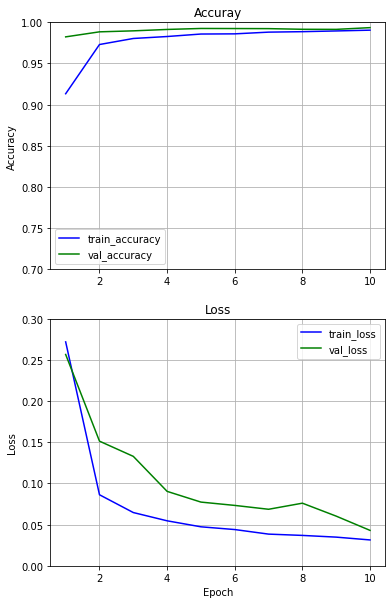

In [9]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,0.3])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### Training 이후

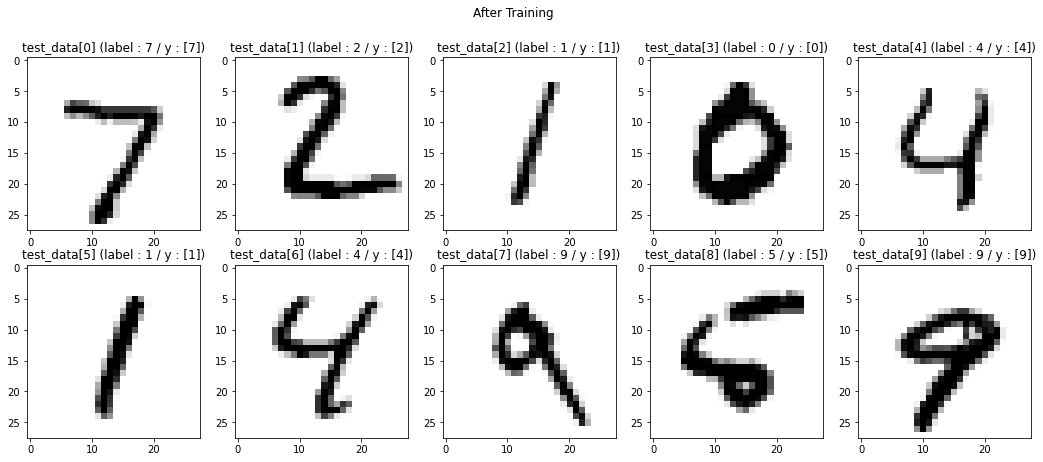

In [10]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)

> ### 모델을 TFLite로 변환

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpac8w7z9o/assets


> ### 파일로 저장

In [12]:
open(save_dir + 'mnist.tflite', 'wb').write(tflite_model)

249368